The dimension of X_train is (348593, 4)
The dimension of X_test is (87149, 4)
The dimension of X_train is (348593, 4)
The dimension of X_test is (87149, 4)
RSquared error value for Linear Regression Model: 0.9258879934982615
RMS error value for Linear Regression Model: 29.71758940506008
RSquared error value for Random Forest Regressor model : 0.9992917518405418
RMS error value for Random Forest Regressor model : 2.905106241996806

prediction

AQI =  [71.61]
Air Quality is Moderate

prediction

AQI =  [71.61]
Air Quality is Moderate

prediction

AQI =  [70.715]
Air Quality is Moderate

prediction

AQI =  [60.71375]
Air Quality is Moderate

prediction

AQI =  [55.27975]
Air Quality is Moderate

prediction

AQI =  [45.84253333]
Air Quality is Good


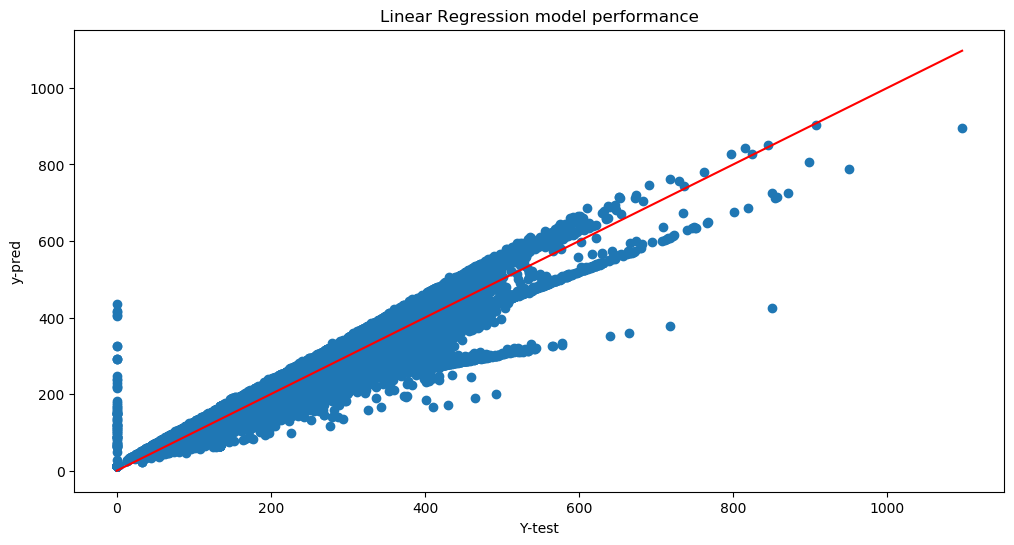

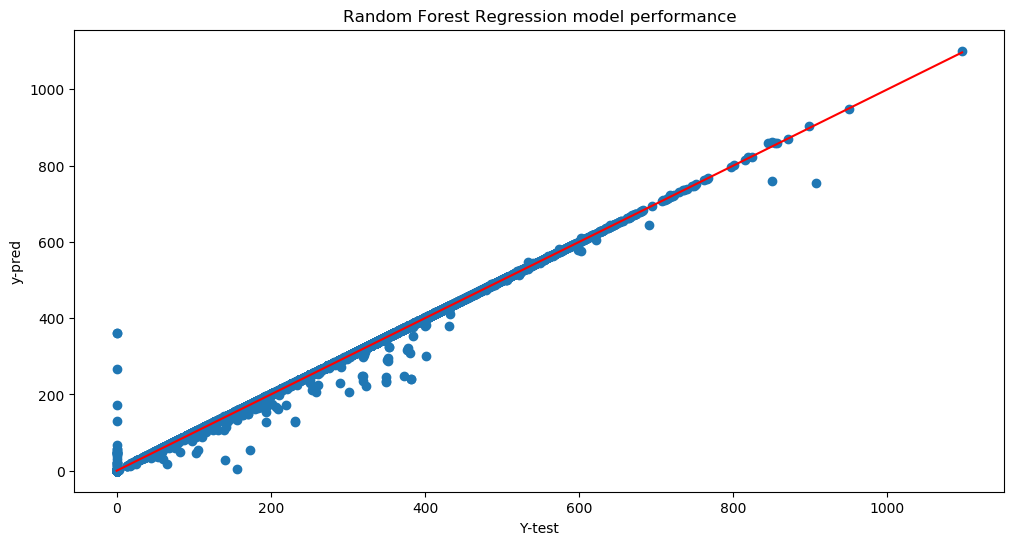

In [1]:
import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression    
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from tkinter import*
from tkinter import filedialog
from PIL import ImageTk,Image
# Save the Random Forest Regressor model to a file using joblib
import joblib 
main=tk.Tk()
main.title("Air Quality Prediction")
main.geometry("1500x1300")
#bg= PhotoImage( file = "wallpaper.jpg")
image = Image.open(r"wallpaper.jpg")
image = image.resize((1650, 1000),Image.ANTIALIAS) 
photo = ImageTk.PhotoImage(image)
#Create a label with the image as background
background_label = tk.Label(main, image=photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

title=Label(main,text="Artificial Intelligence Model for Air Quality Prediction and Analysis from IoT Sensor Data",fg="Black",bg="orange",height=3,width=200).place(x=5,y=5)


def upload():
    global filename
    global dataset
    filename=filedialog.askopenfilename(initialdir="dataset")
    text.insert(END,filename+'Loaded\n\n')
    dataset=pd.read_csv(filename,encoding="unicode_escape")
    text.insert(END,str(dataset.head())+'\n\n')
    
    
def analysis():
    #sns.countplot(data=dataset)
    text.insert(END,'Total Null Values\n\n')
    text.insert(END,str(dataset.isnull().sum())+'\n\n')
    text.insert(END,'Data Discription\n\n')
    #text.insert(END,str(dataset.info())+'\n\n')
    text.insert(END,str(dataset.describe())+'\n\n')
    dataset.drop(['agency'],axis=1,inplace=True)  
    dataset.drop(['stn_code'],axis=1,inplace=True)  
    dataset.drop(['date'],axis=1,inplace=True)  
    dataset.drop(['sampling_date'],axis=1,inplace=True)  
    dataset.drop(['location_monitoring_station'],axis=1,inplace=True) 
    dataset['location']=dataset['location'].fillna(dataset['location'].mode()[0])  
    dataset['type']=dataset['type'].fillna(dataset['type'].mode()[0]) 
    dataset['so2']=dataset['so2'].fillna(dataset['so2'].mean())
    dataset['no2']=dataset['no2'].fillna(dataset['no2'].mean())
    dataset['rspm']=dataset['rspm'].fillna(dataset['rspm'].std())
    dataset['spm']=dataset['spm'].fillna(dataset['spm'].std())
    #dataset.fillna(0, inplace=True)
    text.insert(END,'Total Null Values after cleaning\n\n')
    text.insert(END,str(dataset.isnull().sum())+'\n\n')
    text.insert(END,'ANALYSIS OVER\n\n')
    
def AQI_cal():
    def cal_SOi(so2):
        si=0
        if (so2<=40):
            si= so2*(50/40)
        elif (so2>40 and so2<=80):
            si= 50+(so2-40)*(50/40)
        elif (so2>80 and so2<=380):
            si= 100+(so2-80)*(100/300)
        elif (so2>380 and so2<=800):
            si= 200+(so2-380)*(100/420)
        elif (so2>800 and so2<=1600):
            si= 300+(so2-800)*(100/800)
        elif (so2>1600): 
            si= 400+(so2-1600)*(100/800)
        return si
    dataset['SOi']=dataset['so2'].apply(cal_SOi)
    data= dataset[['so2','SOi']]
    data.head()
    
    def cal_Noi(no2):
        ni=0  
        if(no2<=40):
            ni= no2*50/40  
        elif(no2>40 and no2<=80):  
            ni= 50+(no2-40)*(50/40)  
        elif(no2>80 and no2<=180):  
            ni= 100+(no2-80)*(100/100)  
        elif(no2>180 and no2<=280):  
            ni= 200+(no2-180)*(100/100)  
        elif(no2>280 and no2<=400):  
            ni= 300+(no2-280)*(100/120)  
        else:  
            ni= 400+(no2-400)*(100/120)  
        return ni  
    dataset['Noi']=dataset['no2'].apply(cal_Noi)  
    data= dataset[['no2','Noi']]  
    data.head()
    
    def cal_RSPMI(rspm): 
        rpi=0  
        if(rspm<=30):
            rpi=rspm*50/30  
        elif(rspm>30 and rspm<=60):  
            rpi=50+(rspm-30)*50/30  
        elif(rspm>60 and rspm<=90):  
            rpi=100+(rspm-60)*100/30  
        elif(rspm>90 and rspm<=120):  
            rpi=200+(rspm-90)*100/30  
        elif(rspm>120 and rspm<=250):  
            rpi=300+(rspm-120)*(100/130)  
        else:  
            rpi=400+(rspm-250)*(100/130)  
        return rpi  
    dataset['Rpi']=dataset['rspm'].apply(cal_RSPMI)  
    data= dataset[['rspm','Rpi']]  
    data.head()
    
    def cal_SPMi(spm): 
        spi=0  
        if(spm<=50):  
            spi=spm*50/50  
        elif(spm>50 and spm<=100):  
            spi=50+(spm-50)*(50/50)  
        elif(spm>100 and spm<=250):
            spi= 100+(spm-100)*(100/150)  
        elif(spm>250 and spm<=350):  
            spi=200+(spm-250)*(100/100)  
        elif(spm>350 and spm<=430):  
            spi=300+(spm-350)*(100/80)  
        else:  
            spi=400+(spm-430)*(100/430)  
        return spi   
    dataset['SPMi']=dataset['spm'].apply(cal_SPMi)  
    data= dataset[['spm','SPMi']]  
    data.head()  
    
    def cal_aqi(si,ni,rspmi,spmi):  
        aqi=0  
        if(si>ni and si>rspmi and si>spmi):
            aqi=si  
        if(ni>si and ni>rspmi and ni>spmi):  
            aqi=ni  
        if(rspmi>si and rspmi>ni and rspmi>spmi):  
            aqi=rspmi  
        if(spmi>si and spmi>ni and spmi>rspmi):  
            aqi=spmi  
        return aqi 
    dataset['AQI']=dataset.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)  
    data= dataset[['state','SOi','Noi','Rpi','SPMi','AQI']]  
    data.head()
    
    def AQI_Range(x):
        if x<=50:  
            return "Good"  
        elif x>50 and x<=100:  
            return "Moderate"  
        elif x>100 and x<=200:  
            return "Poor"  
        elif x>200 and x<=300:  
            return "Unhealthy"  
        elif x>300 and x<=400:  
            return "Very unhealthy."  
        elif x>400:  
            return "Hazardous"  
    dataset['AQI_Range'] = dataset['AQI'] .apply(AQI_Range)  
    text.insert(END,str(dataset.head())+'\n\n')
    
    text.insert(END,'AQI CALCULATION OVER\n\n')
    
    
    
def split_data():
    X=dataset[['SOi','Noi','Rpi','SPMi']]
    Y=dataset['AQI']
    X.head()
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
    text.insert(END,'The dimension of X_train is'+str(X_train.shape)+'\n\n')
    text.insert(END,'The dimension of X_test is'+str(X_test.shape)+'\n\n')
    print("The dimension of X_train is {}".format(X_train.shape))
    print("The dimension of X_test is {}".format(X_test.shape))
    text.insert(END,'Data Splitting OVER\n\n')
     

def model_training():
    X=dataset[['SOi','Noi','Rpi','SPMi']]
    Y=dataset['AQI']
    X.head()
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
    print("The dimension of X_train is {}".format(X_train.shape))
    print("The dimension of X_test is {}".format(X_test.shape))
    model1=LinearRegression()
    text.insert(END,str(model1.fit(X_train,Y_train))+'\n\n')
    y_pred1=model1.predict(X_test)
    text.insert(END,str(y_pred1)+'\n\n')
    
    r2score=r2_score(Y_test,y_pred1)
    RMSE=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1)))
    text.insert(END,'RSquared error value for Linear Regression Model:'+str(r2score)+'\n\n')
    text.insert(END,'RMSE error value for Linear Regression Model:'+str(RMSE)+'\n\n')
    plt.figure(figsize=(12,6))
    plt.scatter(Y_test,y_pred1)
    plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
    plt.xlabel("Y-test")
    plt.ylabel("y-pred")
    plt.title("Linear Regression model performance")
    print('RSquared error value for Linear Regression Model:',r2score)
    print('RMS error value for Linear Regression Model:',RMSE)
    
    
    global model2
    model2=RandomForestRegressor()
    text.insert(END,str(model2.fit(X_train,Y_train))+'\n\n')
    y_pred2=model2.predict(X_test)
    text.insert(END,str(y_pred2)+'\n\n')
    
    r2score2=r2_score(Y_test,y_pred2)
    RMSE2=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))
    text.insert(END,'RSquared error value for Random Forest Regression Model:'+str(r2score2)+'\n\n')
    text.insert(END,'RMSE error value for Random Forest Regression Model:'+str(RMSE2)+'\n\n')
    plt.figure(figsize=(12,6))
    plt.scatter(Y_test,y_pred2)
    plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
    plt.xlabel("Y-test")
    plt.ylabel("y-pred")
    plt.title("Random Forest Regression model performance")
    print('RSquared error value for Random Forest Regressor model :',r2score2)
    print('RMS error value for Random Forest Regressor model :',RMSE2)
    
    text.insert(END,'MODEL_BUILDING OVER \n\n')
    # Assuming you have the trained RF model stored in the 'RF' variable
    joblib.dump(model2, 'random_forest_model.joblib')
    
    '''if __name__ == '__main__':
        uploadButton=Button(main,text="prediction",fg="brown",command=prediction)
        uploadButton.place(x=1100,y=100)
        uploadButton.config(font="rog")
    
    def prediction():
        model = joblib.load('random_forest_model.joblib')
        colours = ['SOI',' NOI','RSPMI','SPMI']
        values=[]
        r = 0
        ro=1000
        co=250
        for c in colours:
            tk.Label(text=c, relief=tk.RIDGE, width=10).place(x=ro,y=co)
            values.append(tk.Entry(bg='white', relief=tk.SUNKEN, width=15).place(x=ro+75,y=co))
        r = r + 1
        co=co+20


        p=model.predict(values)
        if p<=50:
            AQI="Air Quality is Good"  
        elif p>50 and p<=100 :
            AQI="Air Quality is Moderate"  
        elif p>100 and p<=200:
            AQI="Air Quality is Poor"  
        elif p>200 and p<=300:
            AQI="Air Quality is Unhealthy"  
        elif p>300 and p<=400:
            AQI="Air Quality is Very unhealthy."  
        elif p>400:
            AQI="Air Quality is Hazardous" 
        
        print("AQI = ",p)
        print(AQI)
 ''' 
def prediction():
    
    fields = ('SOI', 'NOI', 'RPI', 'SPMI')

    def AQI_PRED(entries):
        
        SOI = float(entries['SOI'].get())
        NOI = float(entries['NOI'].get())
        RPI=  float(entries['RPI'].get()) 
        SPMI = float(entries['SPMI'].get())
    
        new_array=np.array([[SOI,NOI,RPI,SPMI]])
        p=model2.predict(new_array)
                           
        print("\nprediction\n")
        if p<=50:
            AQI="Air Quality is Good"  
        elif p>50 and p<=100 :
            AQI="Air Quality is Moderate"  
        elif p>100 and p<=200:
            AQI="Air Quality is Poor"  
        elif p>200 and p<=300:
            AQI="Air Quality is Unhealthy"  
        elif p>300 and p<=400:
            AQI="Air Quality is Very unhealthy."  
        elif p>400:
            AQI="Air Quality is Hazardous" 
        text2.insert(END,'AQI = '+str(p)+'\n\n')
        text2.insert(END,str(AQI)+'\n\n')
        print("AQI = ",p)
        print(AQI)
    

    def makeform(root, fields):
        entries = {}
        for field in fields:
            #print(field)
            row = tk.Frame(root)
            lab = tk.Label(row, width=22, text=field+": ", anchor='w')
            ent = tk.Entry(row)
            #ent.insert(0, "0")
            row.pack(side=tk.TOP, fill=tk.Y, padx=7, pady=5)
            lab.pack(side=tk.LEFT)
            ent.pack(side=tk.RIGHT, expand=tk.YES, fill=tk.X)
            entries[field] = ent
        return entries

    if __name__ == '__main__':
        root = tk.Tk()
        ents = makeform(root, fields)
        
        b1 = tk.Button(root, text='Calculate AQI',command=(lambda e=ents: AQI_PRED(e)))
        b1.pack(side=tk.LEFT, padx=5, pady=5)
        b2 = tk.Button(root, text='Quit', command=root.quit())
        b2.pack(side=tk.LEFT, padx=5, pady=5)
        root.mainloop()
'''       
def prediction():
    #model = joblib.load('random_forest_model.joblib')
    
    fields = ('SOI',' NOI','RSPMI','SPMI')
    def AQI_PRED(values):
        SOI = float(values['SOI'].get())
        NOI = float(values['NOI'].get())
        RPI=  float(values['RSPMI'].get()) 
        SPMI = float(values['SPMI'].get())    

        new_array=np.array([[SOI,NOI,RPI,SPMI]])
        p=model2.predict(new_array)
        if p<=50:
            AQI="Air Quality is Good"  
        elif p>50 and p<=100 :
            AQI="Air Quality is Moderate"  
        elif p>100 and p<=200:
            AQI="Air Quality is Poor"  
        elif p>200 and p<=300:
            AQI="Air Quality is Unhealthy"  
        elif p>300 and p<=400:
            AQI="Air Quality is Very unhealthy."  
        elif p>400:
            AQI="Air Quality is Hazardous" 
            
        text2.insert(END,'Prediction\n\n')  
        text2.insert(END,'AQI = '+str(p)+'\n')
        text2.insert(END,str(AQI)+'\n')        
        print("AQI = ",p)
        print(AQI)
    
    def makeform(main,fields):
        r = 0
        ro=1000
        co=250
        values={}
        for c in fields:
            tk.Label(text=c, relief=tk.RIDGE, width=10).place(x=ro,y=co)
            v=tk.Entry(main,bg='white', relief=tk.SUNKEN, width=15).place(x=ro+75,y=co)
            #v.insert(0, "0")
            values[c]=v
            r = r + 1
            co=co+20
        return values
        

    if __name__ == '__main__':
        ents = makeform(main, fields)
        b1 =Button(main, text='Calculate AQI',command=(lambda e=ents: AQI_PRED(e)))
        b1.place(x=1004,y=330)   
'''
uploadButton=Button(main,text="Upload Dataset",fg="green",command=upload)
uploadButton.place(x=100,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="Analysis",fg="blue",command=analysis)
uploadButton.place(x=300,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="AQI Calculation",fg="violet",command=AQI_cal)
uploadButton.place(x=500,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="Data Spliting",fg="black",command=split_data)
uploadButton.place(x=700,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="model bulding",fg="pink",command=model_training)
uploadButton.place(x=900,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="prediction",fg="brown",command=prediction)
uploadButton.place(x=1100,y=100)
uploadButton.config(font="rog")


    
font1=('times',12,'bold')
text=Text(main,height=20,width=80)
scroll=Scrollbar(text)
text.place(x=15,y=250)
text.config(font="roboto")

font2=('times',12,'bold')
text2=Text(main,height=7,width=30)
scroll2=Scrollbar(text2)
text2.place(x=950,y=500)
text2.config(font="roboto")
'''
tk.Label(main, text="SOI :        ", width=10).place(x=950,y=350)
tk.Label(main, text="NOI :        ", width=10).place(x=950,y=380)
tk.Label(main, text="RSPMI :  ", width=10).place(x=950,y=410)
tk.Label(main, text="SPMI :    ", width=10).place(x=950,y=440)

SOI =tk.Entry(main)
NOI =tk.Entry(main)
RPI =tk.Entry(main)
SPMI=tk.Entry(main)


SOI.place(x=1000,y=350)
NOI.place(x=1000,y=380)
RPI.place(x=1000,y=410)
SPMI.place(x=1000,y=440)
'''

main.mainloop()

In [3]:
colours = ['SOI',' NOI','RSPMI','SPMI']
values=[1,2,3,4]
r = 0
ro=1000
co=250
for c in colours:
    tk.Label(text=c, relief=tk.RIDGE, width=10).place(x=ro,y=co)
    values.append(tk.Entry(bg='white', relief=tk.SUNKEN, width=15).place(x=ro+75,y=co))
    r = r + 1
    co=co+20
print(values)    

[1, 2, 3, 4, None, None, None, None]
